<a href="https://colab.research.google.com/github/donaldocelaj/DS-Sprint-01-Dealing-With-Data/blob/master/Donaldo%20Celaj%20Spring%20Challenge%201" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Load Data
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(data_url, header = None)

      0   1   2  3
0    30  64   1  1
1    30  62   3  1
2    30  65   0  1
3    31  59   2  1
4    31  65   4  1
5    33  58  10  1
6    33  60   0  1
7    34  59   0  2
8    34  66   9  2
9    34  58  30  1
10   34  60   1  1
11   34  61  10  1
12   34  67   7  1
13   34  60   0  1
14   35  64  13  1
15   35  63   0  1
16   36  60   1  1
17   36  69   0  1
18   37  60   0  1
19   37  63   0  1
20   37  58   0  1
21   37  59   6  1
22   37  60  15  1
23   37  63   0  1
24   38  69  21  2
25   38  59   2  1
26   38  60   0  1
27   38  60   0  1
28   38  62   3  1
29   38  64   1  1
..   ..  ..  .. ..
276  67  66   0  1
277  67  61   0  1
278  67  65   0  1
279  68  67   0  1
280  68  68   0  1
281  69  67   8  2
282  69  60   0  1
283  69  65   0  1
284  69  66   0  1
285  70  58   0  2
286  70  58   4  2
287  70  66  14  1
288  70  67   0  1
289  70  68   0  1
290  70  59   8  1
291  70  63   0  1
292  71  68   2  1
293  72  63   0  2
294  72  58   0  1
295  72  64   0  1
296  72  67 

In [2]:
#Check the number of observations (306 expected for each column)
df.count()

0    306
1    306
2    306
3    306
dtype: int64

In [14]:
#Check for Missing Values
df.isnull().sum()

age               0
operation year    0
axillary nodes    0
survival          0
dtype: int64

In [0]:
# Add informative names
col = ['age',
       'operation year',
       'axillary nodes',
       'survival']
df.index = np.arange(306)
df.columns = col


In [0]:
#Change survival value to be a binary 0 or 1
df['survival'] = df['survival'].replace(2, 0)

In [6]:
#First five rows
df.head(5)

,age,operation year,axillary nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [17]:
# Summary statistics 
df.describe()


,age,operation year,axillary nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [8]:
#Correlations
df.corr()

,age,operation year,axillary nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
operation year,0.089529,1.000000,-0.003764,0.004768
axillary nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


In [9]:
# Crosstabulation of axillary nodes to survival

# Create bins for axillary nodes
ax_bins = pd.cut(df['axillary nodes'], 4) 
ct = pd.crosstab(df['survival'], ax_bins, normalize='columns')

ct

axillary nodes,"(-0.052, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]"
survival,,,,
0,0.238267,0.541667,0.333333,0.5
1,0.761733,0.458333,0.666667,0.5


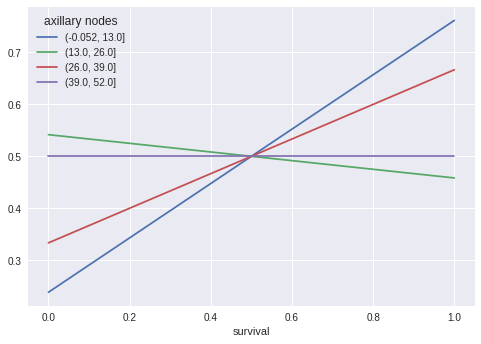

In [10]:
# Line graph showing percentage of people on the Y axis and survival on the X
ct.plot()

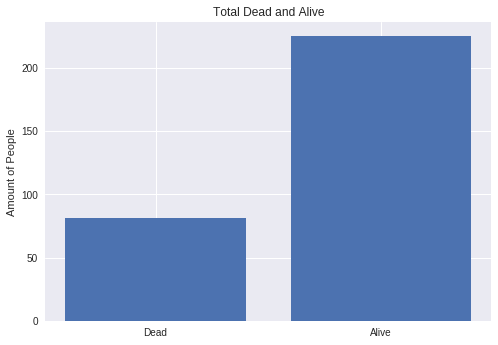

In [11]:
# Bar graph showing total number dead and alive

#Count total number of each
df_dead =  df.loc[df['survival'] == 0]
df_alive =  df.loc[df['survival'] == 1]
total_dead = df_dead['survival'].count()
total_alive = df_alive['survival'].count()

y_pos = np.arange(2)

#Plot our graph
plt.bar(y_pos, (total_dead, total_alive), align='center', alpha=1)
plt.xticks(y_pos, ('Dead', 'Alive'))
plt.ylabel('Amount of People')
plt.title('Total Dead and Alive')
plt.show()


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

There is a very slight positive correlation between operation year and survival. 

Number of positive axillary nodes has a significant negative relationship with survival.

Number of axillary nodes decreased slightly as operation year increased. Since we know that axillary nodes are highly negatively correlated with survival, the slight positive correlation between operation year and survival can be explained by the decrease in positive axillary nodes over time.



In [12]:
ct2 = pd.crosstab(df['operation year'], ax_bins, normalize = 'columns')
ct2

axillary nodes,"(-0.052, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]"
operation year,,,,
58,0.122744,0.000000,0.333333,0.5
59,0.090253,0.083333,0.000000,0.0
60,0.093863,0.083333,0.000000,0.0
61,0.086643,0.041667,0.333333,0.0
62,0.068592,0.125000,0.333333,0.0
63,0.090253,0.208333,0.000000,0.0
64,0.111913,0.000000,0.000000,0.0
65,0.086643,0.166667,0.000000,0.0
66,0.090253,0.125000,0.000000,0.0
